## K-Nearest Neighbor Algorithm

is a non-parameteric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. 

1. Choose the numberof K-neighbors
2. Take the Knn of the new data point, according to the Euclidean distance
3. Among these Kneighbors, count the number of data points in each category
4. Assign the new data point to the category where you counted the most neighbors



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("./data/Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X[:5]}\n\ny: \n{y[:5]}")

X: 
[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]

y: 
[0 0 0 0 0]


### Split the dataset into the Training set and Testing set

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [23]:
print(f"X: \n{X_train[:5]}\n\ny: \n{y_train[:5]}")

X: 
[[    57 122000]
 [    39  71000]
 [    47  25000]
 [    24  19000]
 [    36  50000]]

y: 
[1 0 1 0 0]


In [35]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
print(f"X: \n{X_train[:5]}\n\ny: \n{y_train[:5]}")

X: 
[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]]

y: 
[1 0 1 0 0]


In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
knn.predict(sc.transform([[30, 87_000]]))

array([0], dtype=int64)

In [74]:
y_pred = knn.predict(X_test)
print(
    np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
)

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[59  4]
 [ 3 34]]


0.93

<Axes: >

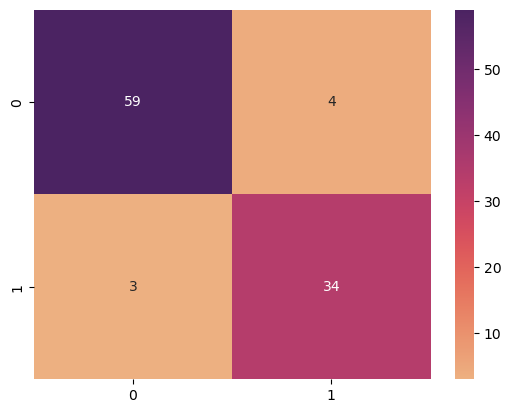

In [90]:
sns.heatmap(cm, annot=True, cmap="flare")

In [89]:
from sklearn.metrics import f1_score, recall_score, precision_score


print(f1_score(y_test, y_pred))

0.9066666666666666


In [87]:
print(recall_score(y_test, y_pred))

0.918918918918919


In [88]:
print(precision_score(y_test, y_pred))

0.8947368421052632


C:\Users\Chris\AppData\Local\Temp\ipykernel_22844\79279155.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


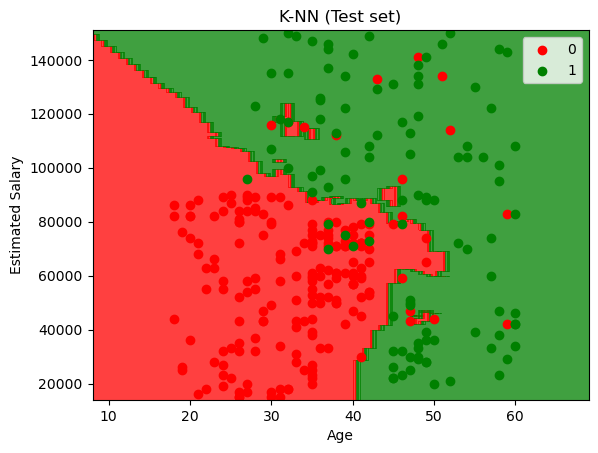

In [94]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1),
)
plt.contourf(
    X1,
    X2,
    knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("K-NN (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()